This notebook provides a model to predict a player's 2018 final batting average using stats from March/April 2018. I felt the best approach to this was to look at a prior year's early season to post season comparison.

The prediction model will use the April 2017 data (there were no games in March 2017, opening day was 4/2/17) and final batting average data from the 2017 season to create a linear regression model. The March/April data from the 2018 season will then be used in this model to predict the final batting average for the 2018 season.

Not all the data points provided for 2018 were obtained for 2017.

The 2017 data uses the labels "MarApr" even though there is no data from March 2017. The "MarApr" label was used to keep the column names consistant with the 2018 data.

2017 data was obtained from Baseball Savant Statcast Search:
https://baseballsavant.mlb.com/statcast_search

In [1]:
# Import dependcies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload csv files data
batting = pd.read_csv("batting.csv")
batting2017 = pd.read_csv("batting2017.csv")

Explore the data

In [3]:
# Display the 2017 column names
batting2017.columns

Index(['Name', 'MarApr_PA', 'MarApr_AB', 'MarApr_H', 'MarApr_HR', 'MarApr_K%',
       'MarApr_BB%', 'MarApr_BABIP', 'MarApr_ISO', 'MarApr_AVG', 'MarApr_SLG',
       'MarApr_OBP', 'FullSeason_AVG'],
      dtype='object')

In [4]:
batting

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,MarApr_FB%,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%,FullSeason_AVG
0,11680,Elias Diaz,Pirates,34,31,15,2,6,6,0,...,0.250,0.143,0.286,0.303,0.656,0.472,0.500,0.975,0.817,0.286
1,12161,Xander Bogaerts,Red Sox,54,51,21,3,8,15,0,...,0.395,0.059,0.176,0.356,0.667,0.507,0.676,0.894,0.816,0.288
2,10816,Jedd Gyorko,Cardinals,30,22,8,2,5,5,1,...,0.529,0.111,0.222,0.295,0.596,0.408,0.522,0.821,0.686,0.262
3,13611,Mookie Betts,Red Sox,107,90,31,8,29,18,3,...,0.519,0.146,0.195,0.191,0.598,0.356,0.694,0.952,0.869,0.346
4,11493,Manny Machado,Orioles,125,108,39,9,14,22,2,...,0.478,0.205,0.205,0.289,0.711,0.458,0.654,0.891,0.801,0.297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,3298,Charlie Culberson,Braves,31,27,3,0,4,0,0,...,0.313,0.000,0.000,0.406,0.659,0.509,0.577,0.724,0.655,0.270
305,7087,Caleb Joseph,Orioles,54,51,7,0,2,2,0,...,0.455,0.000,0.000,0.371,0.678,0.498,0.500,0.848,0.695,0.219
306,8252,Hunter Pence,Giants,61,58,10,0,3,3,1,...,0.324,0.333,0.000,0.381,0.722,0.521,0.660,0.714,0.691,0.226
307,13130,Mikie Mahtook,Tigers,35,31,4,0,3,1,0,...,0.545,0.083,0.000,0.225,0.583,0.406,0.375,0.833,0.707,0.202


In [5]:
# Display the 2018 column names
batting.columns

Index(['playerid', 'Name', 'Team', 'MarApr_PA', 'MarApr_AB', 'MarApr_H',
       'MarApr_HR', 'MarApr_R', 'MarApr_RBI', 'MarApr_SB', 'MarApr_BB%',
       'MarApr_K%', 'MarApr_ISO', 'MarApr_BABIP', 'MarApr_AVG', 'MarApr_OBP',
       'MarApr_SLG', 'MarApr_LD%', 'MarApr_GB%', 'MarApr_FB%', 'MarApr_IFFB%',
       'MarApr_HR/FB', 'MarApr_O-Swing%', 'MarApr_Z-Swing%', 'MarApr_Swing%',
       'MarApr_O-Contact%', 'MarApr_Z-Contact%', 'MarApr_Contact%',
       'FullSeason_AVG'],
      dtype='object')

In [6]:
# Display 2017 datatypes
batting2017.dtypes

Name               object
MarApr_PA           int64
MarApr_AB           int64
MarApr_H            int64
MarApr_HR           int64
MarApr_K%         float64
MarApr_BB%        float64
MarApr_BABIP      float64
MarApr_ISO        float64
MarApr_AVG        float64
MarApr_SLG        float64
MarApr_OBP        float64
FullSeason_AVG    float64
dtype: object

In [7]:
# Display 2018 datatypes
batting.dtypes

playerid               int64
Name                  object
Team                  object
MarApr_PA              int64
MarApr_AB              int64
MarApr_H               int64
MarApr_HR              int64
MarApr_R               int64
MarApr_RBI             int64
MarApr_SB              int64
MarApr_BB%           float64
MarApr_K%            float64
MarApr_ISO           float64
MarApr_BABIP         float64
MarApr_AVG           float64
MarApr_OBP           float64
MarApr_SLG           float64
MarApr_LD%           float64
MarApr_GB%           float64
MarApr_FB%           float64
MarApr_IFFB%         float64
MarApr_HR/FB         float64
MarApr_O-Swing%      float64
MarApr_Z-Swing%      float64
MarApr_Swing%        float64
MarApr_O-Contact%    float64
MarApr_Z-Contact%    float64
MarApr_Contact%      float64
FullSeason_AVG       float64
dtype: object

In [8]:
# Find the minimum number of plate appearances in the 2018 data
batting["MarApr_PA"].min()

30

In [9]:
# Match the minimum number of plate appearances in the 2018 data
batting2017 = batting2017.loc[batting2017["MarApr_PA"]>=30]

In [10]:
# Check if there are missing values in 2017 data
batting2017.isnull().sum()

Name              0
MarApr_PA         0
MarApr_AB         0
MarApr_H          0
MarApr_HR         0
MarApr_K%         0
MarApr_BB%        7
MarApr_BABIP      0
MarApr_ISO        0
MarApr_AVG        0
MarApr_SLG        0
MarApr_OBP        0
FullSeason_AVG    0
dtype: int64

There are 7 players missing BB% data

In [11]:
# Remove the players with missing data
batting2017 = batting2017.dropna()
batting2017.isnull().sum()

Name              0
MarApr_PA         0
MarApr_AB         0
MarApr_H          0
MarApr_HR         0
MarApr_K%         0
MarApr_BB%        0
MarApr_BABIP      0
MarApr_ISO        0
MarApr_AVG        0
MarApr_SLG        0
MarApr_OBP        0
FullSeason_AVG    0
dtype: int64

In [12]:
# Check if there are missing values in 2018 data
batting.isnull().sum()

playerid             0
Name                 0
Team                 0
MarApr_PA            0
MarApr_AB            0
MarApr_H             0
MarApr_HR            0
MarApr_R             0
MarApr_RBI           0
MarApr_SB            0
MarApr_BB%           0
MarApr_K%            0
MarApr_ISO           0
MarApr_BABIP         0
MarApr_AVG           0
MarApr_OBP           0
MarApr_SLG           0
MarApr_LD%           0
MarApr_GB%           0
MarApr_FB%           0
MarApr_IFFB%         0
MarApr_HR/FB         0
MarApr_O-Swing%      0
MarApr_Z-Swing%      0
MarApr_Swing%        0
MarApr_O-Contact%    0
MarApr_Z-Contact%    0
MarApr_Contact%      0
FullSeason_AVG       0
dtype: int64

There are no missing values in the 2018 data

In [13]:
# Check the number of players in the data sets
print(len(batting2017), "players in the 2017 data set")
print(len(batting), "players in the 2018 data set")

329 players in the 2017 data set
309 players in the 2018 data set


Linear regression analysis

In [14]:
# Split the data set into dependent and independent variables

# The 2017 full season batting average will be used as the dependent variable to make the
# prediction model
y2017 = batting2017["FullSeason_AVG"]

# The remainder of the categories aside from player name will be used as the dependent
# variables
# The name column is not needed for analysis
X2017 = batting2017.drop(["Name", "FullSeason_AVG"], axis=1)

# Only use the stats I was able to find for 2017 to apply to the prediction model
X2018 = batting[['MarApr_PA', 'MarApr_AB', 'MarApr_H', 'MarApr_HR', 'MarApr_K%',
       'MarApr_BB%', 'MarApr_BABIP', 'MarApr_ISO', 'MarApr_AVG', 'MarApr_SLG',
       'MarApr_OBP']]

In [15]:
# Create the linear regression model
regr = linear_model.LinearRegression()

# The data will be split into testing and training sets 
    
# Split the data into test and training sets with 20% of data as test set
X_train2017, X_test2017, y_train2017, y_test2017 = train_test_split(X2017, y2017, test_size=0.2, random_state=1)
    
# Make the linear regression model
regr.fit(X_train2017, y_train2017)

LinearRegression()

In [16]:
# Calulate the predicted results
predicted_AVG2017 = regr.predict(X_test2017)
print("Training data r-squared:", regr.score(X_train2017, y_train2017))
print("Test data r-squared:", regr.score(X_test2017, y_test2017))
mse = mean_squared_error(y_test2017, predicted_AVG2017)
rmse = np.sqrt(mse)
print("Mean Squared Error:", rmse)

Training data r-squared: 0.5081029122210063
Test data r-squared: 0.5315088312223437
Mean Squared Error: 0.030262850395790665


The r-squared values for both the training and testing variables are similar. This shows that they both have a similar fit to the regression model.

Keeping this mean squared error value in mind, another model will be analyzed as well for comparison.

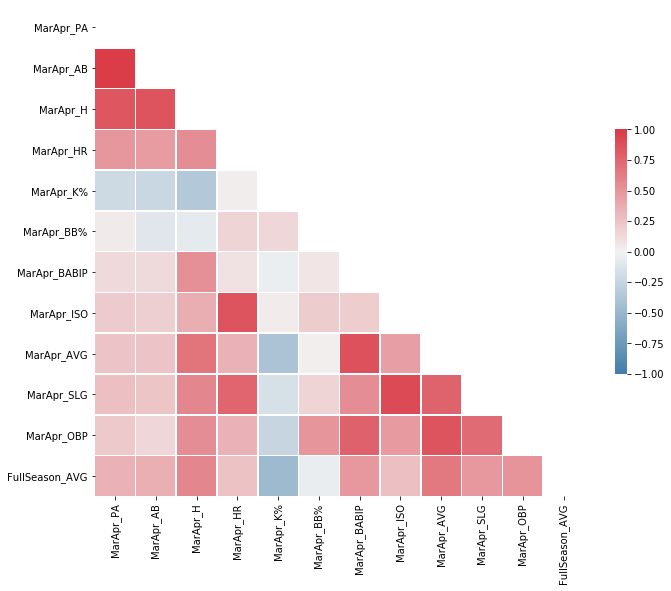

In [17]:
# Take a look at visial representation of correlation between variables
corr = batting2017.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Code used from:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

The above image the correlations between the variables. The variable pairs that are close to 1 or -1 can have an affect on the model (for example AB/PA). This model can be affected by multicollinearity. Next I will investigate the variable with the highest correlation to the full season batting average.

In [18]:
# Look at the correlation
max_corr = corr.sort_values(by="FullSeason_AVG", ascending=False)
max_corr["FullSeason_AVG"]

FullSeason_AVG    1.000000
MarApr_AVG        0.650787
MarApr_H          0.579462
MarApr_OBP        0.514223
MarApr_SLG        0.489735
MarApr_BABIP      0.485977
MarApr_AB         0.361109
MarApr_PA         0.351469
MarApr_ISO        0.268154
MarApr_HR         0.261519
MarApr_BB%       -0.044190
MarApr_K%        -0.475781
Name: FullSeason_AVG, dtype: float64

March/April batting average has the highest correlation to full season batting average, I will use Mar/Apr batting average to make another model for comparison to the original model.

In [19]:
# Split the data set into dependent and independent variables

y2017 = batting2017["FullSeason_AVG"]
X2017 = batting2017[["MarApr_AVG"]]

X2018 = batting[['MarApr_AVG']]

In [20]:
# Create the linear regression model
regr = linear_model.LinearRegression()

# The data will be split into testing and training sets 
    
# Split the data into test and training sets with 20% of data as test set
X_train2017, X_test2017, y_train2017, y_test2017 = train_test_split(X2017, y2017, test_size=0.2, random_state=1)
    
# Make the linear regression model
regr.fit(X_train2017, y_train2017)

LinearRegression()

In [21]:
# Calulate the predicted results
predicted_AVG2017 = regr.predict(X_test2017)
print("Training data r-squared:", regr.score(X_train2017, y_train2017))
print("Test data r-squared:", regr.score(X_test2017, y_test2017))
mse = mean_squared_error(y_test2017, predicted_AVG2017)
rmse = np.sqrt(mse)
print("Mean Squared Error:", rmse)

Training data r-squared: 0.3920725746138439
Test data r-squared: 0.5102883626164193
Mean Squared Error: 0.030940643286889644


The r-squared value for the training set is lower than the r-squared value for the test set. This can be due to the random selection of test/train data.

While the r-squared value for the testing data on this model is slightly little lower than in the original model, it is not too dissimilar. The mean squared error is slightly higher than in the original model, but not too dissimilar from the original model.

For the final predicition I will use the second model because it does not involve varaibles that may contribute to multicollinearity. While the first model showed a smaller mean squared error, the second model may hold true over multiple years whereas the previous model may not.

In [22]:
# Calulate the predicted results for 2018
predicted_AVG2018 = regr.predict(X2018)

In [23]:
# Calulate the predicted results
predicted_AVG = regr.predict(X2018)
results = batting[["playerid", "Name", "Team", "FullSeason_AVG"]]
results["Predicted_AVG"] = predicted_AVG

# Calculate percent error
results["%_Error"] = round(100 * (results["FullSeason_AVG"] - results["Predicted_AVG"]).abs()/results["FullSeason_AVG"],2)

# Download csv results file
results.to_csv("Results.csv")

results

,playerid,Name,Team,FullSeason_AVG,Predicted_AVG,%_Error
0,11680,Elias Diaz,Pirates,0.286,0.347746,21.59
1,12161,Xander Bogaerts,Red Sox,0.288,0.318884,10.72
2,10816,Jedd Gyorko,Cardinals,0.262,0.299642,14.37
3,13611,Mookie Betts,Red Sox,0.346,0.291625,15.72
4,11493,Manny Machado,Orioles,0.297,0.298439,0.48
...,...,...,...,...,...,...
304,3298,Charlie Culberson,Braves,0.270,0.198223,26.58
305,7087,Caleb Joseph,Orioles,0.219,0.208645,4.73
306,8252,Hunter Pence,Giants,0.226,0.222676,1.47
307,13130,Mikie Mahtook,Tigers,0.202,0.205438,1.70


The dataframe above contains the predicted results alongside the actual 2018 full season batting averages and a % error calculation. A complete csv file is included for complete viewing.

In [24]:
print(f"The average % error is:", round(results["%_Error"].mean(),2))

print("The range of % errors is:", round(results["%_Error"].min(),2), "-", 
      round(results["%_Error"].max(),2))

The average % error is: 8.88
The range of % errors is: 0.02 - 49.96


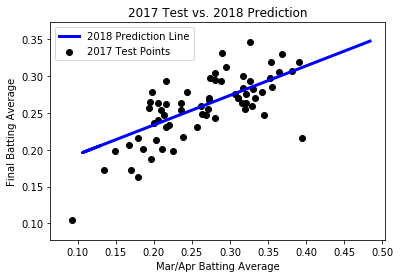

In [25]:
plt.scatter(X_test2017, y_test2017,  color='black')
plt.plot(X2018, predicted_AVG, color='blue', linewidth=3)
plt.title("2017 Test vs. 2018 Prediction")
plt.xlabel("Mar/Apr Batting Average")
plt.ylabel("Final Batting Average")
plt.legend(["2018 Prediction Line", "2017 Test Points"])
plt.show()

The graph shows the fit of the 2017 test data to the 2018 formulated regression line. The majority of the points appear to be clustered around the regression line. However, there are two points that may be potential outliers and reduce the accuracy of the model.

I believe the model used gave a good prediction of the 2018 full season batting averages. It goes on the assumption that two consecutive years are similar for comparison as long as the rules of the game, or other outside factors do not heavily influence the data. One example would be comparing the 2019 season to 2020. The disruption due to Covid-19 would make the 2020 season incomparable to 2019.